## **Modelado del comportamiento de una compuerta OR con un perceptrón**

**1. Importamos las librerías necesarias**

In [1]:
# generales:
import os
import numpy as np
import pandas as pd
import tensorflow as tf

# para las redes neuronales:
from keras import models, layers
from keras.optimizers import SGD
from keras.utils.vis_utils import plot_model

# para plotting:
from matplotlib import cm
from matplotlib import pyplot as plt
%matplotlib inline

f"tensorflow version: {tf.__version__}"

'tensorflow version: 2.9.2'

**2. Creamos los tensores para los datos de entrada y los _targets_**

In [2]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], 'float32')
y = np.array([[0],[1],[1],[1]], 'float32')
X.shape, y.shape

((4, 2), (4, 1))

**3. Calculamos las dimensiones requeridas para el perceptrón**

In [3]:
def getNetParams(x, t):
  if x.shape[0] != t.shape[0]:
    return 0, 0, 0
  features   = x.shape[1]
  categories = t.shape[1]
  samples    = x.shape[0]
  return features, categories, samples

In [4]:
features, categories, samples = getNetParams(X, y)
features, categories, samples

(2, 1, 4)

## **Modelo del perceptrón**

In [5]:
def Perceptron():
    # crear el modelo de perceptrón
    model = models.Sequential(name='OR')
    model.add(
      layers.Dense(
        name='perceptron',
        units=categories,
        activation='sigmoid',
        input_dim=features
      )
    )
    # compilar el modelo
    model.compile(
      loss='mean_squared_error', # función de pérdida
      metrics=["accuracy"]
    ) # métricas con las que se evaluará el modelo
    return model

**4. Instanciamos y entrenamos nuestro modelo**

In [6]:
perceptron = Perceptron()
perceptron.summary()

Model: "OR"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 perceptron (Dense)          (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [7]:
metrics = perceptron.fit(X, y, epochs=1500, verbose=0)

**5. Predecimos valores con nuestro modelo entrenado**

In [8]:
perceptron.predict(X)

1/1 [==============================] - 0s 53ms/step


array([[0.38208818],
       [0.63945556],
       [0.9177027 ],
       [0.96968216]], dtype=float32)

**6. Observamos los valores de los pesos**

In [9]:
W0 = perceptron.layers[0].get_weights()[0]
b0 = perceptron.layers[0].get_weights()[1]
W0, b0

(array([[2.892229 ],
        [1.0536962]], dtype=float32), array([-0.48069426], dtype=float32))

### **Interpretando resultados**

**7. Observamos la función de pérdida de nuestro modelo durante el entrenamiento**

'min val: 0.07096429169178009, last val: 0.07096429169178009'

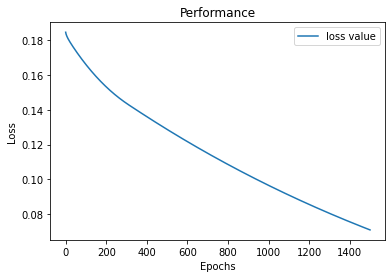

In [10]:
loss = metrics.history['loss']

ax = pd.DataFrame({'loss value': loss}).plot(title='Performance')
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.plot()

f"min val: {min(loss)}, last val: {loss[-1]}"

**8. Observamos en un espacio tridimensional los datos de entrada y el hyperplano de separación**

In [11]:
def sigmoid(X):
   return 1/(1 + np.exp(-X)) 

In [12]:
t = np.arange(-2, 3, 1, dtype=int)
x1, x2 = np.meshgrid(t, t)

I = W0[0, 0]*x1 + W0[1, 0]*x2 + b0[0]
z = sigmoid(I)

3888/3888 [==============================] - 5s 1ms/step


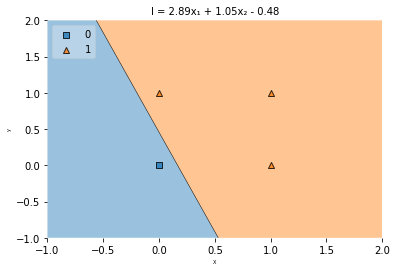

In [21]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X=X, y=y.reshape((-1,)).astype(int), clf=perceptron, legend=2)
plt.xlabel("X", size=5)
plt.ylabel("y", size=5)
plt.title("I = 2.89x₁ + 1.05x₂ - 0.48", size=10)
plt.show()

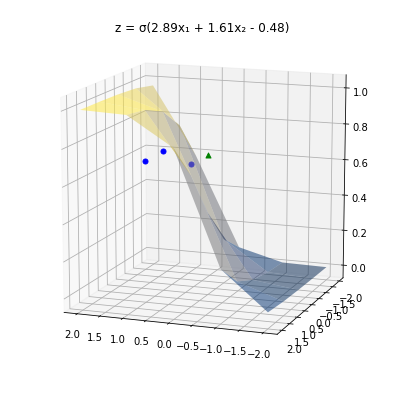

In [22]:
def plotBoundaries(colorMap):
  fig = plt.figure(figsize=(7, 7))
  
  ax2 = plt.subplot(111, projection='3d')  
  ax2.set_title("z = σ(2.89x₁ + 1.61x₂ - 0.48)")

  ax2.view_init(13, 110)
  ax2.plot_surface(x1, x2, z, alpha=0.50, cmap=colorMap)

  for u, v in zip(X.tolist(), y.tolist()):
    ax2.scatter(u[0], u[1], [0.70], s=25.0, c="green" if v[0] == 0 else "blue", marker="^" if v[0] == 0 else "o")
  
  plt.show()

plotBoundaries(colorMap=cm.cividis)